In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
mes_df = pd.read_csv('MES_0622.csv')
mes_df.shape

(123710, 6)

# Exploratory Data Analysis

In [3]:
mes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Country  123710 non-null  object 
 1   Time     123710 non-null  object 
 2   Balance  123710 non-null  object 
 3   Product  123710 non-null  object 
 4   Value    123710 non-null  float64
 5   Unit     123710 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.7+ MB


In [4]:
mes_df.head()

,Country,Time,Balance,Product,Value,Unit
0,Australia,1/6/2022,Net Electricity Production,Electricity,22902.2860,GWh
1,Australia,1/6/2022,Net Electricity Production,Total Combustible Fuels,15745.8102,GWh
2,Australia,1/6/2022,Net Electricity Production,"Coal, Peat and Manufactured Gases",10236.5862,GWh
3,Australia,1/6/2022,Net Electricity Production,Oil and Petroleum Products,340.3700,GWh
4,Australia,1/6/2022,Net Electricity Production,Natural Gas,4915.8613,GWh


In [5]:
mes_df['Country'].nunique()

53

In [6]:
mes_df['Product'].value_counts()

Electricity                                   35658
Total Combustible Fuels                        7098
Total Renewables (Geo, Solar, Wind, Other)     7098
Oil and Petroleum Products                     7020
Hydro                                          7016
Combustible Renewables                         6988
Wind                                           6988
Natural Gas                                    6918
Solar                                          6826
Coal, Peat and Manufactured Gases              6611
Other Combustible Non-Renewables               6370
Not Specified                                  5547
Nuclear                                        5249
Geothermal                                     4812
Other Renewables                               3511
Name: Product, dtype: int64

There are 53 countries in the dataset

In [7]:
mes_df['Time'].max()

'1/9/2021'

In [8]:
#converting Time to datetime format
mes_df['Time'] = pd.to_datetime(mes_df['Time'])

In [9]:
mes_df['Product'].nunique()

15

In [10]:
mes_df['Balance'].nunique()

6

In [11]:
def country_search(country_list, df):
    """
    This method searches a dataframe column,
    for countries in a list
    """
    for country in country_list:
        for i in range(len(df.Country)):
            if mes_df.Country[i] == country:
                print(country + ' found')
                break
            else:
                continue

In [42]:
country_list = ['Ireland', 'United Kingdom', 'Germany', 'Norway']
country_search(country_list,mes_df)

Ireland found
United Kingdom found
Germany found
Norway found


Creating a dataframe of countries in the list only.

In [43]:
countries_df = mes_df[mes_df['Country'].isin(country_list)]
countries_df['Country'].nunique()

4

In [44]:
countries_df = countries_df.reindex()

In [45]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11082 entries, 185 to 123591
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Country  11082 non-null  object        
 1   Time     11082 non-null  datetime64[ns]
 2   Balance  11082 non-null  object        
 3   Product  11082 non-null  object        
 4   Value    11082 non-null  float64       
 5   Unit     11082 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 606.0+ KB


1. How does Ireland compared to other countries in terms of Electricity production vs consumption?

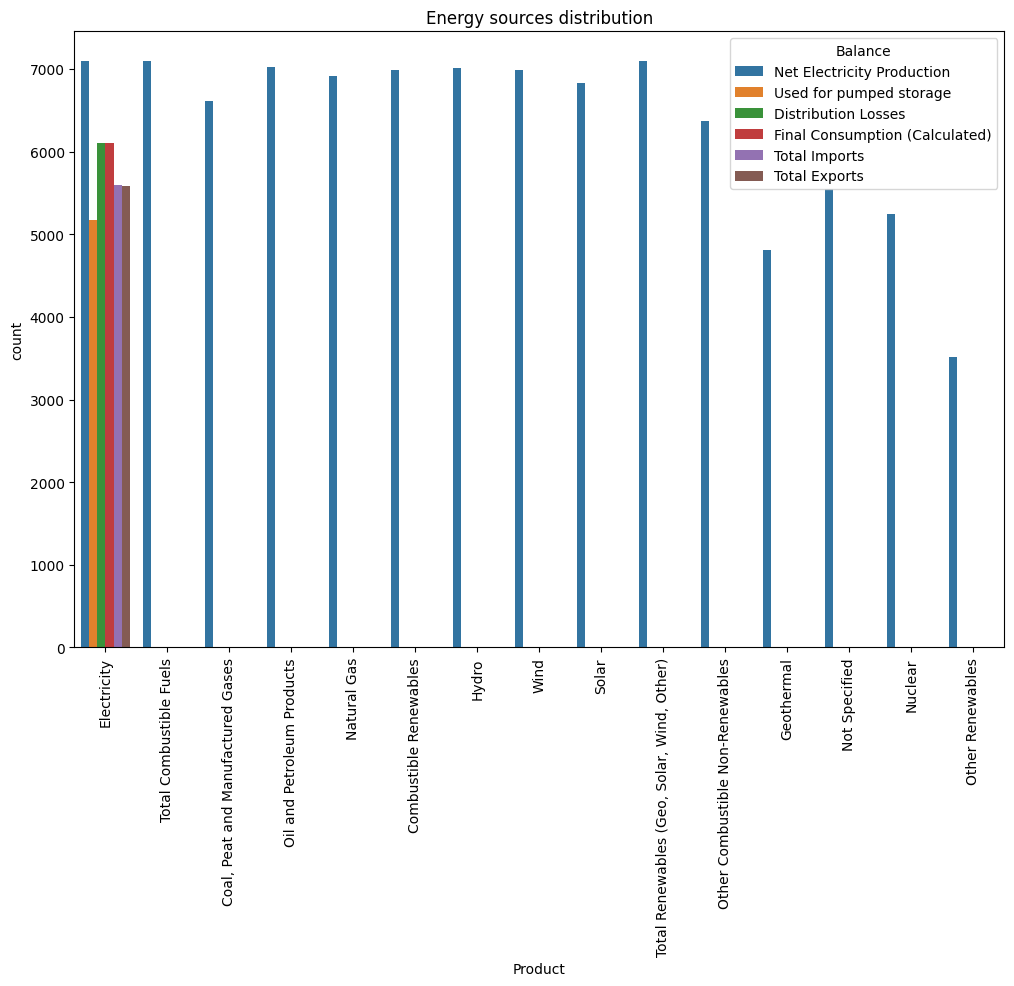

In [46]:
plt.figure(figsize=(12,8))
plt.title("Energy sources distribution")
plt.xlabel("Energy Sources")
plt.ylabel("Distribution")
# base_color = sns.color_palette()[0]
sns.countplot(
    data = mes_df,
    x = 'Product',
    hue='Balance'
    # color=base_color
);
plt.xticks(rotation=90);

It seems Electricity Product values sum all other sources?

In [47]:
countries_df['Balance'].value_counts()

Net Electricity Production        8082
Total Imports                      600
Total Exports                      600
Used for pumped storage            600
Distribution Losses                600
Final Consumption (Calculated)     600
Name: Balance, dtype: int64

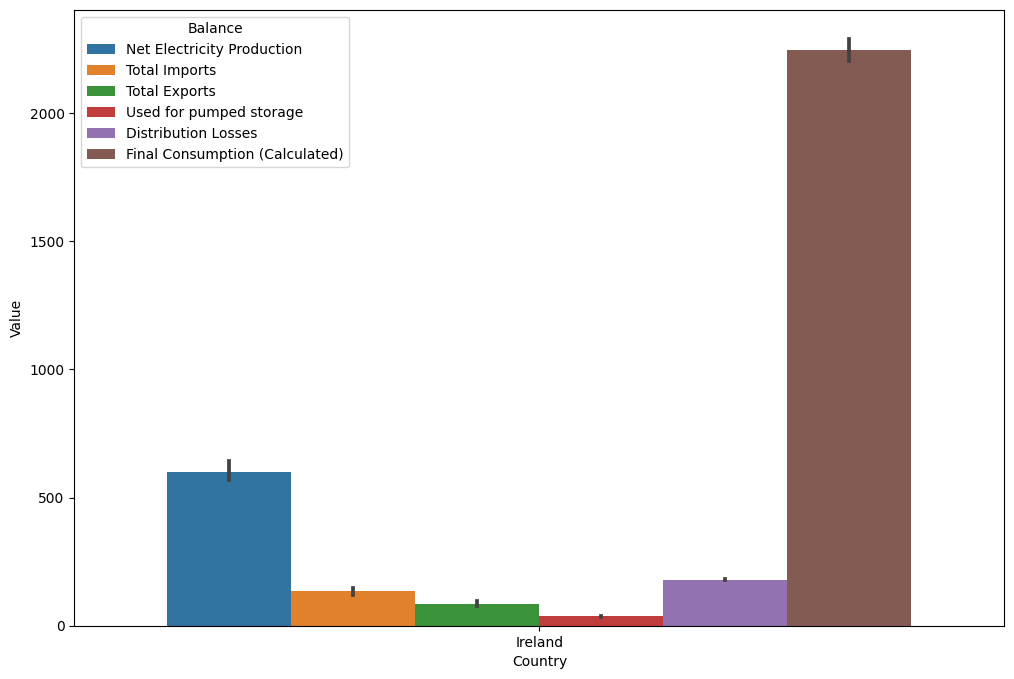

In [48]:
plt.figure(figsize=(12,8))
sns.barplot(
    data = countries_df[countries_df['Country'] == 'Ireland'],
    x = 'Country',
    y = 'Value',
    hue = 'Balance'
);


Ireland seems to have a high electricity consumption level compared to electricity generation.

In [49]:
#filtering for electricity values
elec_countries_df = countries_df[countries_df['Product'] == 'Electricity']
elec_countries_df.head()

,Country,Time,Balance,Product,Value,Unit
185,Germany,2022-01-06,Net Electricity Production,Electricity,42096.4717,GWh
199,Germany,2022-01-06,Total Imports,Electricity,4700.2535,GWh
200,Germany,2022-01-06,Total Exports,Electricity,4761.8730,GWh
201,Germany,2022-01-06,Used for pumped storage,Electricity,563.5029,GWh
202,Germany,2022-01-06,Distribution Losses,Electricity,1894.1258,GWh


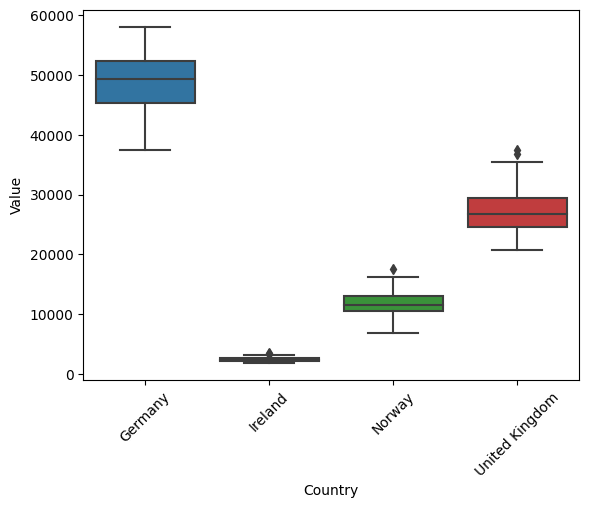

In [50]:
sns.boxplot(
    data = elec_countries_df[elec_countries_df['Balance'] == 'Net Electricity Production'],
    y = 'Value',
    x = 'Country',
);
plt.xticks(rotation = 45);

China is ahead of the other countries in Electricity production.

In [51]:
countries_df['Product'].value_counts()

Electricity                                   3600
Total Combustible Fuels                        600
Coal, Peat and Manufactured Gases              600
Oil and Petroleum Products                     600
Combustible Renewables                         600
Hydro                                          600
Wind                                           600
Total Renewables (Geo, Solar, Wind, Other)     600
Natural Gas                                    596
Other Combustible Non-Renewables               576
Solar                                          564
Not Specified                                  468
Nuclear                                        396
Geothermal                                     388
Other Renewables                               294
Name: Product, dtype: int64

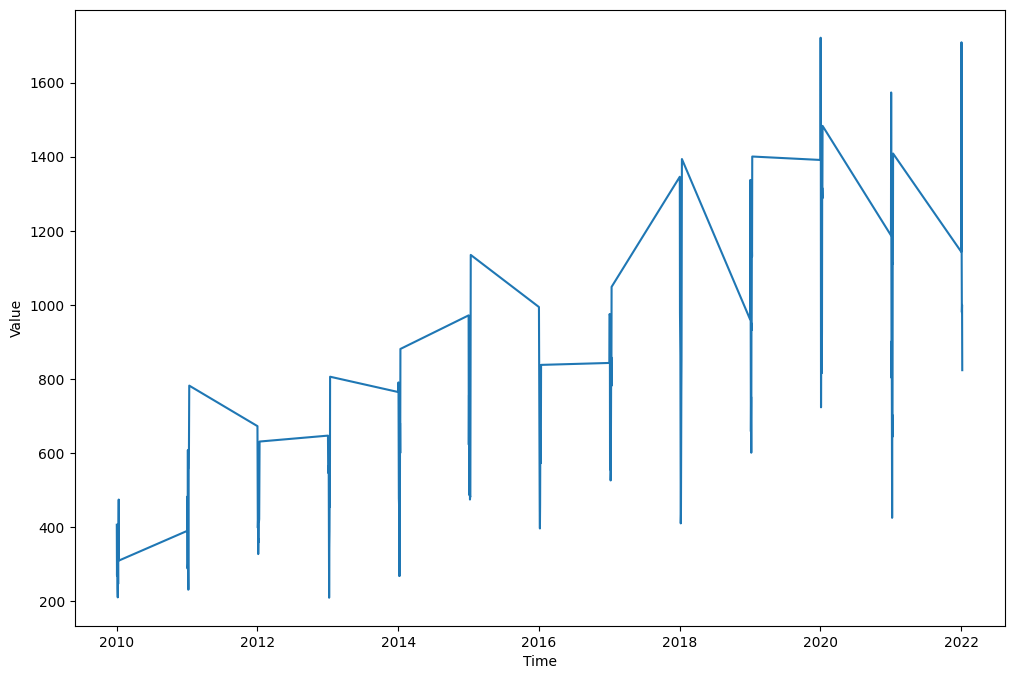

In [52]:
plt.figure(figsize=(12,8))
sns.lineplot(
    data = countries_df.query("Country == 'Ireland' & Product == 'Total Renewables (Geo, Solar, Wind, Other)'"),
    x = 'Time',
    y = 'Value'
);

There is a general upward trend in renewable energy generation in Ireland since 2012

In [53]:
countries_df.head()

,Country,Time,Balance,Product,Value,Unit
185,Germany,2022-01-06,Net Electricity Production,Electricity,42096.4717,GWh
186,Germany,2022-01-06,Net Electricity Production,Nuclear,2166.0746,GWh
187,Germany,2022-01-06,Net Electricity Production,Total Combustible Fuels,24128.1559,GWh
188,Germany,2022-01-06,Net Electricity Production,"Coal, Peat and Manufactured Gases",13657.0974,GWh
189,Germany,2022-01-06,Net Electricity Production,Oil and Petroleum Products,421.1905,GWh


Create SQLLite DB for this data, then query it.

In [54]:
#countries_df.stack('Country')

In [55]:
#change Country and Balance dtypes to category
countries_df['Country'] = countries_df['Country'].astype('category')
countries_df['Balance'] = countries_df['Balance'].astype('category')

In [56]:
countries_df.groupby("Country").head()

,Country,Time,Balance,Product,Value,Unit
185,Germany,2022-01-06,Net Electricity Production,Electricity,42096.4717,GWh
186,Germany,2022-01-06,Net Electricity Production,Nuclear,2166.0746,GWh
187,Germany,2022-01-06,Net Electricity Production,Total Combustible Fuels,24128.1559,GWh
188,Germany,2022-01-06,Net Electricity Production,"Coal, Peat and Manufactured Gases",13657.0974,GWh
189,Germany,2022-01-06,Net Electricity Production,Oil and Petroleum Products,421.1905,GWh
246,Ireland,2022-01-06,Net Electricity Production,Electricity,2604.7124,GWh
247,Ireland,2022-01-06,Net Electricity Production,Total Combustible Fuels,1840.7335,GWh
248,Ireland,2022-01-06,Net Electricity Production,"Coal, Peat and Manufactured Gases",255.8499,GWh
249,Ireland,2022-01-06,Net Electricity Production,Oil and Petroleum Products,68.9656,GWh
250,Ireland,2022-01-06,Net Electricity Production,Natural Gas,1441.4639,GWh


In [57]:
#changing df to wide format
pivoted_df = countries_df.pivot(
    index=['Country', 'Time'],
    columns=['Balance', 'Product'],
    values='Value'
)

In [58]:
pivoted_df.head()

Balance            Net Electricity Production             \
Product                           Electricity    Nuclear   
Country Time                                               
Germany 2010-01-01                  56064.044  12537.344   
        2010-01-02                  51450.432  11010.010   
        2010-01-03                  54013.534  11649.048   
        2010-01-04                  48012.828  10100.639   
        2010-01-05                  46674.747  10644.280   

Balance                                                                       \
Product            Total Combustible Fuels Coal, Peat and Manufactured Gases   
Country Time                                                                   
Germany 2010-01-01               37957.548                         25193.476   
        2010-01-02               34277.960                         22534.887   
        2010-01-03               34057.077                         22226.258   
        2010-01-04               31310.919                         20595.534   
        2010-01-05               29795.108                         19684.158   

Balance                                                    \
Product            Oil and Petroleum Products Natural Gas   
Country Time                                                
Germany 2010-01-01                   1016.591    8936.584   
        2010-01-02                    843.429    8251.203   
        2010-01-03                    670.619    8290.429   
        2010-01-04                    514.483    7170.868   
        2010-01-05                    683.582    6144.459   

Balance                                                                     \
Product            Combustible Renewables Other Combustible Non-Renewables   
Country Time                                                                 
Germany 2010-01-01               2367.575                          443.323   
        2010-01-02               2230.741                          417.701   
        2010-01-03               2417.163                          452.608   
        2010-01-04               2552.151                          477.884   
        2010-01-05               2765.142                          517.766   

Balance                                                                    \
Product                Hydro      Wind     Solar Geothermal Not Specified   
Country Time                                                                
Germany 2010-01-01  2078.530  2906.482   423.832      2.123       158.185   
        2010-01-02  1780.047  3695.588   533.211      2.086       151.530   
        2010-01-03  2202.391  4901.152  1026.954      2.169       174.744   
        2010-01-04  1946.794  3145.056  1366.063      1.783       141.575   
        2010-01-05  2298.699  2692.018  1101.996      1.683       140.962   

Balance                                                       Total Imports  \
Product            Total Renewables (Geo, Solar, Wind, Other)   Electricity   
Country Time                                                                  
Germany 2010-01-01                                   7778.542      2785.207   
        2010-01-02                                   8241.673      2771.487   
        2010-01-03                                  10549.829      3704.423   
        2010-01-04                                   9011.847      2950.829   
        2010-01-05                                   8859.538      3280.778   

Balance            Total Exports Used for pumped storage Distribution Losses  \
Product              Electricity             Electricity         Electricity   
Country Time                                                                   
Germany 2010-01-01      6153.180                 664.276            2266.089   
        2010-01-02      5672.061                 568.884            2038.142   
        2010-01-03      5947.561                 703.860            2118.520   
        2010-01-04      5236.509  

In [59]:
pivoted_df.loc[('Germany', '2010-01-01'), ('Net Electricity Production', 'Electricity')]

Country  Time      
Germany  2010-01-01    56064.044
Name: (Net Electricity Production, Electricity), dtype: float64

In [60]:
pivoted_df.loc[: , ('Net Electricity Production', 'Electricity')]

Country         Time      
Germany         2010-01-01    56064.0440
                2010-01-02    51450.4320
                2010-01-03    54013.5340
                2010-01-04    48012.8280
                2010-01-05    46674.7470
                                 ...    
United Kingdom  2022-01-02    25048.8370
                2022-01-03    26174.6049
                2022-01-04    24613.5565
                2022-01-05    25421.4445
                2022-01-06    23716.7982
Name: (Net Electricity Production, Electricity), Length: 600, dtype: float64

<AxesSubplot:xlabel='Time'>

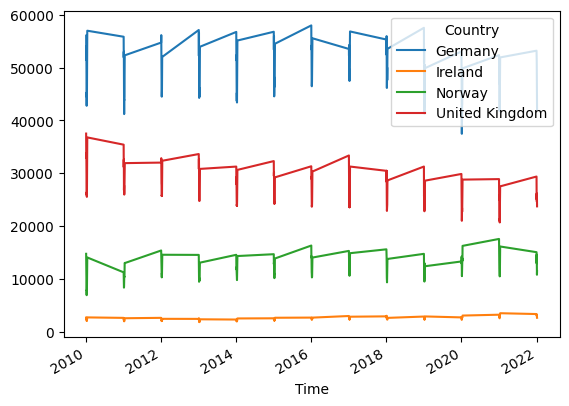

In [61]:
pivoted_df.loc[: , ('Net Electricity Production', 'Electricity')].unstack('Country').plot()

In [62]:
pivoted_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 600 entries, ('Germany', Timestamp('2010-01-01 00:00:00')) to ('United Kingdom', Timestamp('2022-01-06 00:00:00'))
Data columns (total 20 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   (Net Electricity Production, Electricity)                                 600 non-null    float64
 1   (Net Electricity Production, Nuclear)                                     396 non-null    float64
 2   (Net Electricity Production, Total Combustible Fuels)                     600 non-null    float64
 3   (Net Electricity Production, Coal, Peat and Manufactured Gases)           600 non-null    float64
 4   (Net Electricity Production, Oil and Petroleum Products)                  600 non-null    float64
 5   (Net Electricity Production, Natural Gas)                                 59